## Importing Libraries

In [352]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import skimage.color

## Downloading Image

In [353]:
#download image
!wget -O image.jpg https://raw.githubusercontent.com/ozgunsungar/highlight_color/main/rose.jpg

--2022-04-19 18:39:20--  https://i.stack.imgur.com/dd9tg.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.32.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.32.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60590 (59K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  59.17K  --.-KB/s    in 0.01s   

2022-04-19 18:39:20 (3.85 MB/s) - ‘image.jpg’ saved [60590/60590]



## Image Preprocessing

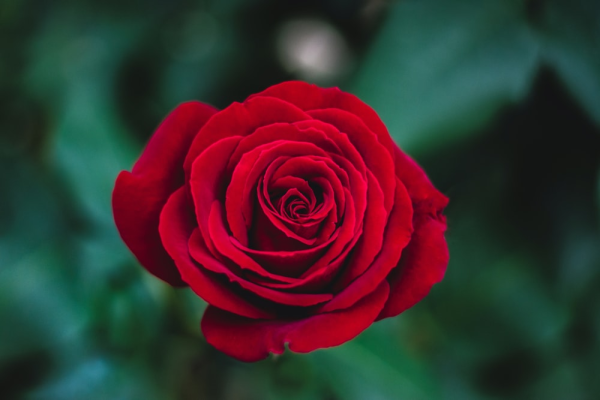

In [354]:
# open an image using opencv
img = cv2.imread('image.jpg')
img2 = np.copy(img)
# get image height and width
height, width, channels = img.shape

scale_percent = 60  # percent of original size
width = int(width * scale_percent / 100)
height = int(height * scale_percent / 100)
dim = (width, height)
img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

## HSV Color Model Processing

In [355]:
#convert the BGR image to HSV colour space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#obtain the grayscale image of the original image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [356]:
# set the bounds for the red hue
#np.array([h.min , s.min ,v.min]) for lower_red

# lower mask (0-15)
lower_red = np.array([0,10,50])
upper_red = np.array([15,255,255])
mask0 = cv2.inRange(hsv, lower_red, upper_red)

# upper mask (165-180)
lower_red = np.array([165,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)

# join my masks
# mask = mask0+mask1

In [357]:
# create a mask using the bounds set
mask = cv2.inRange(hsv, lower_red, upper_red)
# create an inverse of the mask
mask_inv = cv2.bitwise_not(mask)
# Filter only the red colour from the original image using the mask(foreground)
res = cv2.bitwise_and(img, img, mask=mask)
# Filter the regions containing colours other than red from the grayscale image(background)
background = cv2.bitwise_and(gray, gray, mask = mask_inv)

In [358]:
# convert the one channelled grayscale background to a three channelled image
background = np.stack((background,)*3, axis=-1)
# add the foreground and the background
img_highlighted = cv2.add(res, background)


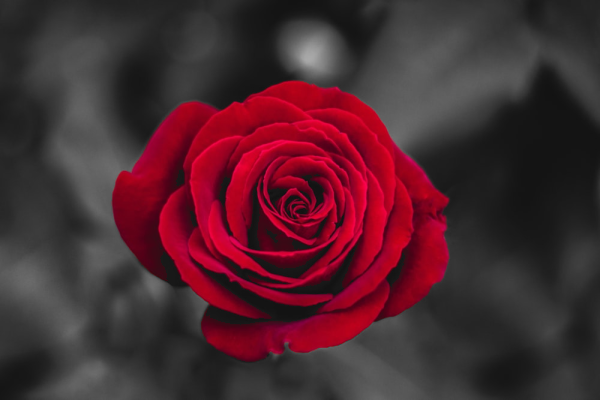

True

In [359]:
cv2_imshow(img_highlighted)

# save image using opencv
cv2.imwrite('highlighted_apple.jpg', img_highlighted)

## YIQ Color Model Processing

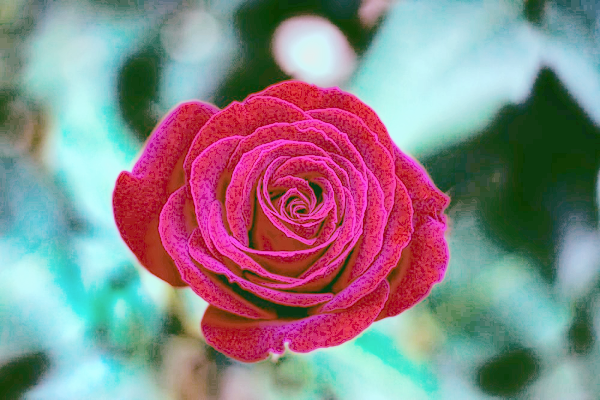

In [360]:
B,G,R = cv2.split(img)

B = cv2.equalizeHist(B)
G = cv2.equalizeHist(G)
R = cv2.equalizeHist(R)

Y = 0.299*R+0.587*G+0.114*B
I = 0.596*R-0.274*G-0.322*B
Q = 0.211*R-0.523*G+0.312*B

Y = np.uint8(Y)

Y = cv2.equalizeHist(Y)

Y = Y.astype(np.float64)


R = 1.0*Y+0.956*I+0.621*Q
G = 1.0*Y-0.272*I-0.647*Q
B = 1.0*Y-1.106*I+1.703*Q


histogram_yiq = np.dstack((B,G,R))


#normalize the image

mx = np.amax(histogram_yiq)
mn = np.amin(histogram_yiq)

histogram_yiq = (histogram_yiq - mn) / (mx - mn) * 255

cv2_imshow(histogram_yiq)